In [2]:
import os
from glob import glob
import dask
import xarray as xr
import xrft
import cartopy.crs as ccrs
import numpy as np
from netCDF4 import Dataset
from scipy.io import loadmat
from cmocean import cm

from datetime import datetime
import dateutil

from matplotlib import pyplot as plt
%matplotlib inline

In [3]:
from dask.distributed import Client, LocalCluster
    #
cluster = LocalCluster()
client = Client(cluster)
client

<Client: 'tcp://127.0.0.1:43023' processes=16 threads=128, memory=251.08 GiB>

2025-04-24 06:02:50,797 - distributed.nanny.memory - WARNING - Worker tcp://127.0.0.1:46269 (pid=1207827) exceeded 95% memory budget. Restarting...
2025-04-24 06:02:50,901 - distributed.nanny.memory - WARNING - Worker tcp://127.0.0.1:37023 (pid=1207858) exceeded 95% memory budget. Restarting...
2025-04-24 06:02:52,893 - distributed.nanny - WARNING - Restarting worker
2025-04-24 06:02:52,922 - distributed.nanny - WARNING - Restarting worker
2025-04-24 06:25:25,095 - distributed.nanny.memory - WARNING - Worker tcp://127.0.0.1:35697 (pid=1208418) exceeded 95% memory budget. Restarting...
2025-04-24 06:25:26,764 - distributed.nanny - WARNING - Restarting worker


# Read rechunked data

In [18]:
# the path where (Zach's) LLC4320 data are already stored
LLC_data_folder = '/meddy/yuxlong5/data/data_zarr/'
# the path where the data will be re-stored
out_dir_zarr = '/meddy/yuxlong5/data/data_rechunk_time/'

# rechunk data (lat and depth)

In [4]:
# variable 
v = 'U'

ds = xr.open_zarr(LLC_data_folder+v+'_total_rechunk.zarr')
print(ds)
chunks = {'time': 9415, 'lat': 1, 'lon_g': 177, 'depth':1}
ds = ds.chunk(chunks)
del ds[v].encoding['chunks']
print(ds)
file_out = out_dir_zarr+'/%s_total_rechunk.zarr'%(v)
%time ds.to_zarr(file_out, mode='w') 

<xarray.Dataset>
Dimensions:  (time: 9415, depth: 52, lat: 201, lon_g: 177)
Coordinates:
  * depth    (depth) float64 0.5 1.57 2.79 4.185 ... 855.8 900.1 945.6 992.3
  * time     (time) float64 0.0 0.04167 0.08333 0.125 ... 392.2 392.2 392.2
Dimensions without coordinates: lat, lon_g
Data variables:
    U        (time, depth, lat, lon_g) float32 dask.array<chunksize=(9415, 1, 201, 177), meta=np.ndarray>
<xarray.Dataset>
Dimensions:  (time: 9415, depth: 52, lat: 201, lon_g: 177)
Coordinates:
  * depth    (depth) float64 0.5 1.57 2.79 4.185 ... 855.8 900.1 945.6 992.3
  * time     (time) float64 0.0 0.04167 0.08333 0.125 ... 392.2 392.2 392.2
Dimensions without coordinates: lat, lon_g
Data variables:
    U        (time, depth, lat, lon_g) float32 dask.array<chunksize=(9415, 1, 1, 177), meta=np.ndarray>


2025-04-22 15:34:53,943 - distributed.worker.memory - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker-memory.html#memory-not-released-back-to-the-os for more information. -- Unmanaged memory: 11.01 GiB -- Worker memory limit: 15.69 GiB
2025-04-22 15:34:59,196 - distributed.worker.memory - WARNING - Worker is at 80% memory usage. Pausing worker.  Process memory: 12.59 GiB -- Worker memory limit: 15.69 GiB
2025-04-22 15:35:00,339 - distributed.worker.memory - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker-memory.html#memory-not-released-back-to-the-os for more information. -- Unmanaged memory: 10.99 GiB -- Worker memory limit: 15.69 GiB
2025-04-22 15:35:01,317 - distributed.worker.memory - WARNING - Unmanaged memory use is high. This may indicate a memo

CPU times: user 16 s, sys: 4.74 s, total: 20.7 s
Wall time: 2min 45s


In [5]:
v = 'V'

ds = xr.open_zarr(LLC_data_folder+v+'_total_rechunk.zarr')
chunks = {'time': 9415, 'lat_g': 1, 'lon': 177, 'depth':1}
ds = ds.chunk(chunks)
del ds[v].encoding['chunks']
print(ds)
file_out = out_dir_zarr+'/%s_total_rechunk.zarr'%(v)
%time ds.to_zarr(file_out, mode='w') 

<xarray.Dataset>
Dimensions:  (time: 9415, depth: 52, lat_g: 201, lon: 177)
Coordinates:
  * depth    (depth) float64 0.5 1.57 2.79 4.185 ... 855.8 900.1 945.6 992.3
  * time     (time) float64 0.0 0.04167 0.08333 0.125 ... 392.2 392.2 392.2
Dimensions without coordinates: lat_g, lon
Data variables:
    V        (time, depth, lat_g, lon) float32 dask.array<chunksize=(9415, 1, 1, 177), meta=np.ndarray>
CPU times: user 17.7 s, sys: 5.11 s, total: 22.8 s
Wall time: 3min 1s


In [6]:
v = 'W'

ds = xr.open_zarr(LLC_data_folder+v+'_total_rechunk.zarr')
chunks = {'time': 9415, 'lat': 1, 'lon': 177, 'depth':1}
ds = ds.chunk(chunks)
del ds[v].encoding['chunks']
print(ds)
file_out = out_dir_zarr+'/%s_total_rechunk.zarr'%(v)
%time ds.to_zarr(file_out, mode='w') 

<xarray.Dataset>
Dimensions:  (time: 9415, depth: 52, lat: 201, lon: 177)
Coordinates:
  * depth    (depth) float64 0.5 1.57 2.79 4.185 ... 855.8 900.1 945.6 992.3
  * time     (time) float64 0.0 0.04167 0.08333 0.125 ... 392.2 392.2 392.2
Dimensions without coordinates: lat, lon
Data variables:
    W        (time, depth, lat, lon) float32 dask.array<chunksize=(9415, 1, 1, 177), meta=np.ndarray>
CPU times: user 22.6 s, sys: 7.2 s, total: 29.8 s
Wall time: 4min 41s


In [7]:
v = 'Theta'

ds = xr.open_zarr(LLC_data_folder+v+'_total_rechunk.zarr')
chunks = {'time': 9415, 'lat': 1, 'lon': 177, 'depth':1}
ds = ds.chunk(chunks)
del ds[v].encoding['chunks']
print(ds)
file_out = out_dir_zarr+'/%s_total_rechunk.zarr'%(v)
%time ds.to_zarr(file_out, mode='w') 

<xarray.Dataset>
Dimensions:  (time: 9415, depth: 52, lat: 201, lon: 177)
Coordinates:
  * depth    (depth) float64 0.5 1.57 2.79 4.185 ... 855.8 900.1 945.6 992.3
  * time     (time) float64 0.0 0.04167 0.08333 0.125 ... 392.2 392.2 392.2
Dimensions without coordinates: lat, lon
Data variables:
    Theta    (time, depth, lat, lon) float32 dask.array<chunksize=(9415, 1, 1, 177), meta=np.ndarray>
CPU times: user 49.2 s, sys: 8.16 s, total: 57.3 s
Wall time: 2min 48s


In [8]:
v = 'Salt'

ds = xr.open_zarr(LLC_data_folder+v+'_total_rechunk.zarr')
chunks = {'time': 9415, 'lat': 1, 'lon': 177, 'depth':1}
ds = ds.chunk(chunks)
del ds[v].encoding['chunks']
print(ds)
file_out = out_dir_zarr+'/%s_total_rechunk.zarr'%(v)
%time ds.to_zarr(file_out, mode='w') 

<xarray.Dataset>
Dimensions:  (time: 9415, depth: 52, lat: 201, lon: 177)
Coordinates:
  * depth    (depth) float64 0.5 1.57 2.79 4.185 ... 855.8 900.1 945.6 992.3
  * time     (time) float64 0.0 0.04167 0.08333 0.125 ... 392.2 392.2 392.2
Dimensions without coordinates: lat, lon
Data variables:
    Salt     (time, depth, lat, lon) float32 dask.array<chunksize=(9415, 1, 1, 177), meta=np.ndarray>
CPU times: user 19.2 s, sys: 5.45 s, total: 24.7 s
Wall time: 3min 9s


In [9]:
v = 'Pden'

ds = xr.open_zarr(LLC_data_folder+v+'_total_rechunk.zarr')
chunks = {'time': 9415, 'lat': 1, 'lon': 177, 'depth':1}
ds = ds.chunk(chunks)
del ds[v].encoding['chunks']
print(ds)
file_out = out_dir_zarr+'/%s_total_rechunk.zarr'%(v)
%time ds.to_zarr(file_out, mode='w') 

<xarray.Dataset>
Dimensions:  (time: 9415, depth: 52, lat: 201, lon: 177)
Coordinates:
  * depth    (depth) float64 0.5 1.57 2.79 4.185 ... 855.8 900.1 945.6 992.3
  * time     (time) float64 0.0 0.04167 0.08333 0.125 ... 392.2 392.2 392.2
Dimensions without coordinates: lat, lon
Data variables:
    Pden     (time, depth, lat, lon) float32 dask.array<chunksize=(9415, 1, 1, 177), meta=np.ndarray>
CPU times: user 12.6 s, sys: 2.35 s, total: 15 s
Wall time: 49.3 s


In [12]:
v = 'Buoy'

ds = xr.open_zarr(LLC_data_folder+'Buoy_total_rechunk.zarr')
chunks = {'time': 9415, 'lat': 1, 'lon': 177, 'depth':1}
ds = ds.chunk(chunks)
#del ds[v].encoding['chunks']
print(ds)
file_out = out_dir_zarr+'/%s_total_rechunk.zarr'%(v)
%time ds.to_zarr(file_out, mode='w') 

<xarray.Dataset>
Dimensions:  (depth: 52, lat: 201, lon: 177, time: 9415)
Coordinates:
  * depth    (depth) float64 0.5 1.57 2.79 4.185 ... 855.8 900.1 945.6 992.3
  * time     (time) float64 0.0 0.04167 0.08333 0.125 ... 392.2 392.2 392.2
Dimensions without coordinates: lat, lon
Data variables:
    Buoy     (time, depth, lat, lon) float32 dask.array<chunksize=(9415, 1, 1, 177), meta=np.ndarray>
<xarray.Dataset>
Dimensions:  (depth: 52, lat: 201, lon: 177, time: 9415)
Coordinates:
  * depth    (depth) float64 0.5 1.57 2.79 4.185 ... 855.8 900.1 945.6 992.3
  * time     (time) float64 0.0 0.04167 0.08333 0.125 ... 392.2 392.2 392.2
Dimensions without coordinates: lat, lon
Data variables:
    Buoy     (time, depth, lat, lon) float32 dask.array<chunksize=(9415, 1, 1, 177), meta=np.ndarray>
CPU times: user 43.1 s, sys: 1.86 s, total: 44.9 s
Wall time: 1min 18s


# Rechunk (time)

In [16]:
out_dir_zarr

'/meddy/yuxlong5/data/data_rechunk_time/'

In [5]:
v = 'Theta'

ds = xr.open_zarr(LLC_data_folder+v+'_total_rechunk.zarr')
chunks = {'time': 1, 'lat': 201, 'lon': 177, 'depth':52}
ds = ds.chunk(chunks)
del ds[v].encoding['chunks']
print(ds)
file_out = out_dir_zarr+'/%s_total_rechunk.zarr'%(v)
%time ds.to_zarr(file_out, mode='w') 

<xarray.Dataset>
Dimensions:  (time: 9415, depth: 52, lat: 201, lon: 177)
Coordinates:
  * depth    (depth) float64 0.5 1.57 2.79 4.185 ... 855.8 900.1 945.6 992.3
  * time     (time) float64 0.0 0.04167 0.08333 0.125 ... 392.2 392.2 392.2
Dimensions without coordinates: lat, lon
Data variables:
    Theta    (time, depth, lat, lon) float32 dask.array<chunksize=(1, 52, 201, 177), meta=np.ndarray>
CPU times: user 12.5 s, sys: 2.77 s, total: 15.3 s
Wall time: 1min 27s


In [19]:
v = 'Salt'

ds = xr.open_zarr(LLC_data_folder+v+'_total_rechunk.zarr')
chunks = {'time': 1, 'lat': 201, 'lon': 177, 'depth':52}
ds = ds.chunk(chunks)
del ds[v].encoding['chunks']
print(ds)
file_out = out_dir_zarr+'/%s_total_rechunk.zarr'%(v)
%time ds.to_zarr(file_out, mode='w') 

<xarray.Dataset>
Dimensions:  (time: 9415, depth: 52, lat: 201, lon: 177)
Coordinates:
  * depth    (depth) float64 0.5 1.57 2.79 4.185 ... 855.8 900.1 945.6 992.3
  * time     (time) float64 0.0 0.04167 0.08333 0.125 ... 392.2 392.2 392.2
Dimensions without coordinates: lat, lon
Data variables:
    Salt     (time, depth, lat, lon) float32 dask.array<chunksize=(1, 52, 201, 177), meta=np.ndarray>
CPU times: user 53.8 s, sys: 10.1 s, total: 1min 3s
Wall time: 4min 5s


In [20]:
# variable 
v = 'U'

ds = xr.open_zarr(LLC_data_folder+v+'_total_rechunk.zarr')
print(ds)
chunks = {'time': 1, 'lat': 201, 'lon_g': 177, 'depth':52}
ds = ds.chunk(chunks)
del ds[v].encoding['chunks']
print(ds)
file_out = out_dir_zarr+'/%s_total_rechunk.zarr'%(v)
%time ds.to_zarr(file_out, mode='w') 

<xarray.Dataset>
Dimensions:  (time: 9415, depth: 52, lat: 201, lon_g: 177)
Coordinates:
  * depth    (depth) float64 0.5 1.57 2.79 4.185 ... 855.8 900.1 945.6 992.3
  * time     (time) float64 0.0 0.04167 0.08333 0.125 ... 392.2 392.2 392.2
Dimensions without coordinates: lat, lon_g
Data variables:
    U        (time, depth, lat, lon_g) float32 dask.array<chunksize=(9415, 1, 201, 177), meta=np.ndarray>
<xarray.Dataset>
Dimensions:  (time: 9415, depth: 52, lat: 201, lon_g: 177)
Coordinates:
  * depth    (depth) float64 0.5 1.57 2.79 4.185 ... 855.8 900.1 945.6 992.3
  * time     (time) float64 0.0 0.04167 0.08333 0.125 ... 392.2 392.2 392.2
Dimensions without coordinates: lat, lon_g
Data variables:
    U        (time, depth, lat, lon_g) float32 dask.array<chunksize=(1, 52, 201, 177), meta=np.ndarray>


2025-04-24 06:25:06,017 - distributed.worker.memory - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker-memory.html#memory-not-released-back-to-the-os for more information. -- Unmanaged memory: 11.00 GiB -- Worker memory limit: 15.69 GiB
2025-04-24 06:25:08,548 - distributed.worker.memory - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker-memory.html#memory-not-released-back-to-the-os for more information. -- Unmanaged memory: 11.01 GiB -- Worker memory limit: 15.69 GiB
2025-04-24 06:25:09,956 - distributed.worker.memory - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker-memory.html#memory-not-released-back-to-the-os for more information. 

CPU times: user 43.1 s, sys: 9.04 s, total: 52.2 s
Wall time: 4min 31s


In [21]:
v = 'V'

ds = xr.open_zarr(LLC_data_folder+v+'_total_rechunk.zarr')
chunks = {'time': 1, 'lat_g': 201, 'lon': 177, 'depth':52}
ds = ds.chunk(chunks)
del ds[v].encoding['chunks']
print(ds)
file_out = out_dir_zarr+'/%s_total_rechunk.zarr'%(v)
%time ds.to_zarr(file_out, mode='w') 

<xarray.Dataset>
Dimensions:  (time: 9415, depth: 52, lat_g: 201, lon: 177)
Coordinates:
  * depth    (depth) float64 0.5 1.57 2.79 4.185 ... 855.8 900.1 945.6 992.3
  * time     (time) float64 0.0 0.04167 0.08333 0.125 ... 392.2 392.2 392.2
Dimensions without coordinates: lat_g, lon
Data variables:
    V        (time, depth, lat_g, lon) float32 dask.array<chunksize=(1, 52, 201, 177), meta=np.ndarray>
CPU times: user 57.5 s, sys: 11.5 s, total: 1min 9s
Wall time: 4min 41s


In [22]:
v = 'W'

ds = xr.open_zarr(LLC_data_folder+v+'_total_rechunk.zarr')
chunks = {'time': 1, 'lat': 201, 'lon': 177, 'depth':52}
ds = ds.chunk(chunks)
del ds[v].encoding['chunks']
print(ds)
file_out = out_dir_zarr+'/%s_total_rechunk.zarr'%(v)
%time ds.to_zarr(file_out, mode='w') 

<xarray.Dataset>
Dimensions:  (time: 9415, depth: 52, lat: 201, lon: 177)
Coordinates:
  * depth    (depth) float64 0.5 1.57 2.79 4.185 ... 855.8 900.1 945.6 992.3
  * time     (time) float64 0.0 0.04167 0.08333 0.125 ... 392.2 392.2 392.2
Dimensions without coordinates: lat, lon
Data variables:
    W        (time, depth, lat, lon) float32 dask.array<chunksize=(1, 52, 201, 177), meta=np.ndarray>
CPU times: user 58.6 s, sys: 11.4 s, total: 1min 10s
Wall time: 4min 54s


In [17]:
out_dir_zarr

'/meddy/yuxlong5/data/data_rechunk_time/'

# Read rechunked data

In [4]:
out_dir_zarr = '/meddy/yuxlong5/data/data_rechunk/'

grid = xr.open_dataset('/meddy/yuxlong5/data/data_zarr/Grid.nc', decode_coords=True)
ds_U = xr.open_zarr(out_dir_zarr+'U_total_rechunk.zarr')
ds_V = xr.open_zarr(out_dir_zarr+'V_total_rechunk.zarr')
ds_W = xr.open_zarr(out_dir_zarr+'W_total_rechunk.zarr')
ds_T = xr.open_zarr(out_dir_zarr+'Theta_total_rechunk.zarr')
ds_S = xr.open_zarr(out_dir_zarr+'Salt_total_rechunk.zarr')
ds_P = xr.open_zarr(out_dir_zarr+'Pden_total_rechunk.zarr')

ds = xr.merge([ds_U,ds_V,ds_W,ds_T,ds_S,ds_P,grid])

# define (real) time
def iters_to_date(iters, delta_t=3600.):
    t0 = datetime(2011,9,13,0)    
    ltime = delta_t * (np.array(iters))
    dtime = [t0+dateutil.relativedelta.relativedelta(seconds=t) for t in ltime]    
    return dtime

time_day = iters_to_date(np.arange(9415))
ds = ds.assign_coords(time=time_day) 

print(ds)
print('\n data size: %.1f GB' %(ds.nbytes / 1e9))

<xarray.Dataset>
Dimensions:  (time: 9415, depth: 52, lat: 201, lon_g: 177, lat_g: 201, lon: 177)
Coordinates: (12/21)
  * depth    (depth) float64 0.5 1.57 2.79 4.185 ... 855.8 900.1 945.6 992.3
  * time     (time) datetime64[ns] 2011-09-13 ... 2012-10-09T06:00:00
  * lat      (lat) float32 47.4 47.42 47.43 47.44 ... 49.95 49.96 49.98 49.99
  * lon_g    (lon_g) float32 -18.04 -18.02 -18.0 -17.98 ... -14.42 -14.4 -14.38
  * lon      (lon) float32 -18.03 -18.01 -17.99 -17.97 ... -14.41 -14.39 -14.36
  * lat_g    (lat_g) float32 47.4 47.41 47.42 47.44 ... 49.94 49.96 49.97 49.98
    ...       ...
    dxG      (lat_g, lon) float32 ...
    dyG      (lat, lon_g) float32 ...
    rA       (lat, lon) float32 ...
    rAz      (lat_g, lon_g) float32 ...
    rAw      (lat, lon_g) float32 ...
    rAs      (lat_g, lon) float32 ...
Data variables:
    U        (time, depth, lat, lon_g) float32 dask.array<chunksize=(9415, 1, 1, 177), meta=np.ndarray>
    V        (time, depth, lat_g, lon) float32 das

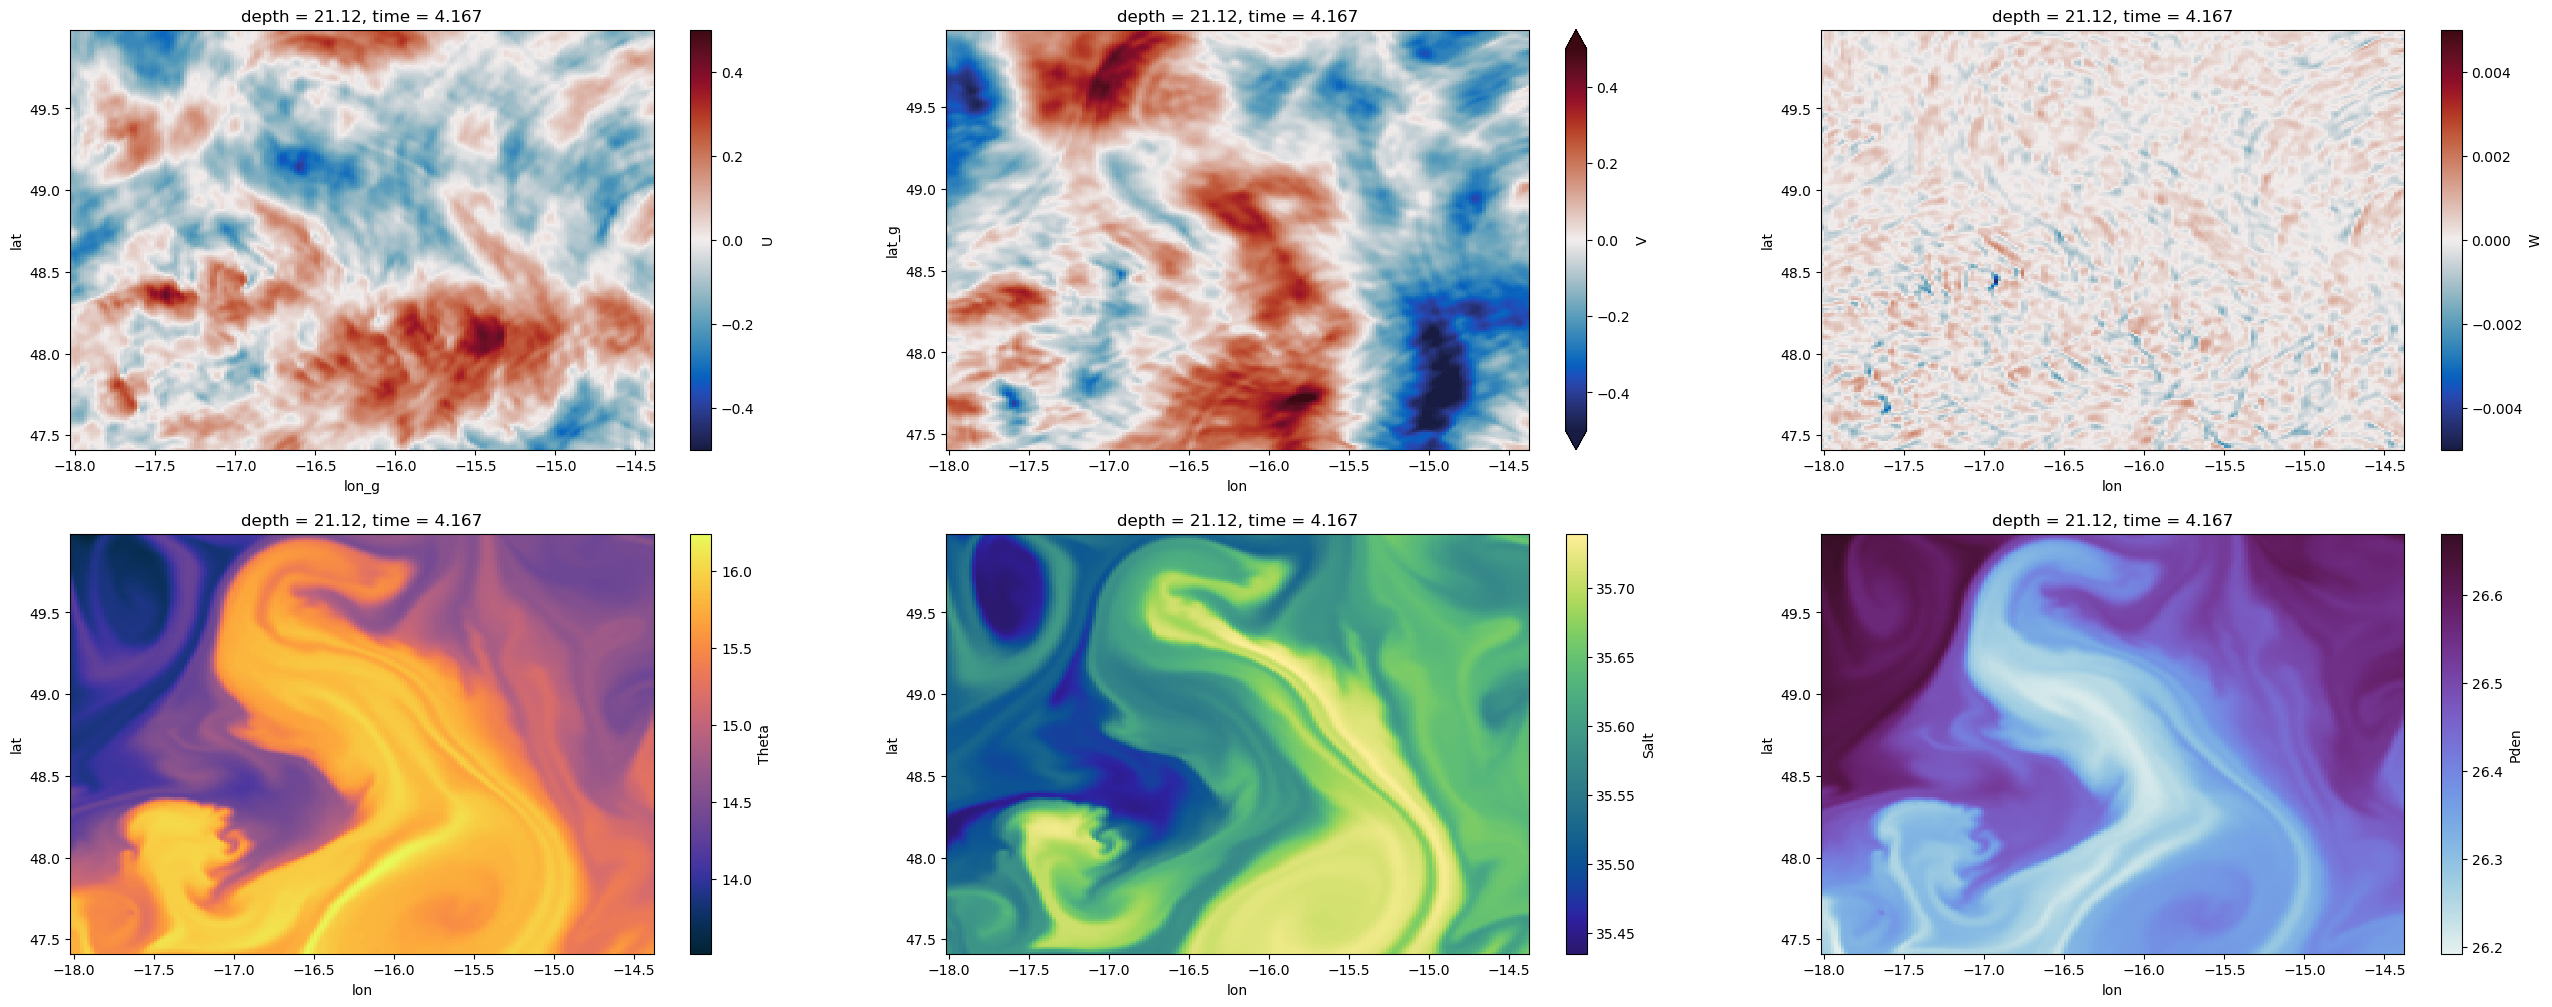

In [21]:
fig = plt.figure(figsize=(32,12))

plt.subplot(231)
ds.U.isel(lat=slice(1,-1),lon_g=slice(1,-1), time=100, depth=10).plot(x='lon_g', y='lat', vmin=-0.5, vmax=0.5, cmap=cm.balance)
plt.subplot(232)
ds.V.isel(lat_g=slice(1,-1),lon=slice(1,-1), time=100, depth=10).plot(x='lon', y='lat_g', vmin=-0.5, vmax=0.5, cmap=cm.balance)
plt.subplot(233)
ds.W.isel(lat=slice(1,-1),lon=slice(1,-1), time=100, depth=10).plot(x='lon', y='lat', vmin=-0.005, vmax=0.005, cmap=cm.balance)

plt.subplot(234)
ds.Theta.isel(lat=slice(1,-1),lon=slice(1,-1), time=100, depth=10).plot(x='lon', y='lat', cmap=cm.thermal)
plt.subplot(235)
ds.Salt.isel(lat=slice(1,-1),lon=slice(1,-1), time=100, depth=10).plot(x='lon', y='lat', cmap=cm.haline)
plt.subplot(236)
ds.Pden.isel(lat=slice(1,-1),lon=slice(1,-1), time=100, depth=10).plot(x='lon', y='lat', cmap=cm.dense)

# Daily average

In [23]:
out_dir_zarr = '/meddy/yuxlong5/data/data_rechunk_time/'

grid = xr.open_dataset('/meddy/yuxlong5/data/data_zarr/Grid.nc', decode_coords=True)
ds_T = xr.open_zarr(out_dir_zarr+'Theta_total_rechunk.zarr')
ds_S = xr.open_zarr(out_dir_zarr+'Salt_total_rechunk.zarr')
ds_U = xr.open_zarr(out_dir_zarr+'U_total_rechunk.zarr')
ds_V = xr.open_zarr(out_dir_zarr+'V_total_rechunk.zarr')
ds_W = xr.open_zarr(out_dir_zarr+'W_total_rechunk.zarr')

ds = xr.merge([ds_T,ds_S,ds_U,ds_V,ds_W,grid])

# define (real) time
def iters_to_date(iters, delta_t=3600.):
    t0 = datetime(2011,9,13,0)    
    ltime = delta_t * (np.array(iters))
    dtime = [t0+dateutil.relativedelta.relativedelta(seconds=t) for t in ltime]    
    return dtime

time_day = iters_to_date(np.arange(9415))
ds = ds.assign_coords(time=time_day) 

print(ds)
print('\n data size: %.1f GB' %(ds.nbytes / 1e9))

<xarray.Dataset>
Dimensions:  (time: 9415, depth: 52, lat: 201, lon: 177, lon_g: 177, lat_g: 201)
Coordinates: (12/21)
  * depth    (depth) float64 0.5 1.57 2.79 4.185 ... 855.8 900.1 945.6 992.3
  * time     (time) datetime64[ns] 2011-09-13 ... 2012-10-09T06:00:00
  * lon      (lon) float32 -18.03 -18.01 -17.99 -17.97 ... -14.41 -14.39 -14.36
  * lat      (lat) float32 47.4 47.42 47.43 47.44 ... 49.95 49.96 49.98 49.99
  * lon_g    (lon_g) float32 -18.04 -18.02 -18.0 -17.98 ... -14.42 -14.4 -14.38
  * lat_g    (lat_g) float32 47.4 47.41 47.42 47.44 ... 49.94 49.96 49.97 49.98
    ...       ...
    dxG      (lat_g, lon) float32 ...
    dyG      (lat, lon_g) float32 ...
    rA       (lat, lon) float32 ...
    rAz      (lat_g, lon_g) float32 ...
    rAw      (lat, lon_g) float32 ...
    rAs      (lat_g, lon) float32 ...
Data variables:
    Theta    (time, depth, lat, lon) float32 dask.array<chunksize=(1, 52, 201, 177), meta=np.ndarray>
    Salt     (time, depth, lat, lon) float32 dask.ar

In [24]:
ds_daily = ds.resample(time='D').mean()
ds_daily

<xarray.Dataset>
Dimensions:  (time: 393, depth: 52, lat: 201, lon: 177, lon_g: 177, lat_g: 201)
Coordinates: (12/21)
  * depth    (depth) float64 0.5 1.57 2.79 4.185 ... 855.8 900.1 945.6 992.3
  * lon      (lon) float32 -18.03 -18.01 -17.99 -17.97 ... -14.41 -14.39 -14.36
  * lat      (lat) float32 47.4 47.42 47.43 47.44 ... 49.95 49.96 49.98 49.99
  * lon_g    (lon_g) float32 -18.04 -18.02 -18.0 -17.98 ... -14.42 -14.4 -14.38
  * lat_g    (lat_g) float32 47.4 47.41 47.42 47.44 ... 49.94 49.96 49.97 49.98
    XC       (lat, lon) float32 -18.03 -18.01 -17.99 ... -14.41 -14.39 -14.36
    ...       ...
    dyG      (lat, lon_g) float32 1.469e+03 1.469e+03 ... 1.403e+03 1.403e+03
    rA       (lat, lon) float32 2.302e+06 2.302e+06 ... 2.09e+06 2.09e+06
    rAz      (lat_g, lon_g) float32 2.303e+06 2.303e+06 ... 2.09e+06 2.09e+06
    rAw      (lat, lon_g) float32 2.302e+06 2.302e+06 ... 2.09e+06 2.09e+06
    rAs      (lat_g, lon) float32 2.303e+06 2.303e+06 ... 2.09e+06 2.09e+06
  * time     (time) datetime64[ns] 2011-09-13 2011-09-14 ... 2012-10-09
Data variables:
    Theta    (time, depth, lat, lon) float32 dask.array<chunksize=(1, 52, 201, 177), meta=np.ndarray>
    Salt     (time, depth, lat, lon) float32 dask.array<chunksize=(1, 52, 201, 177), meta=np.ndarray>
    U        (time, depth, lat, lon_g) float32 dask.array<chunksize=(1, 52, 201, 177), meta=np.ndarray>
    V        (time, depth, lat_g, lon) float32 dask.array<chunksize=(1, 52, 201, 177), meta=np.ndarray>
    W        (time, depth, lat, lon) float32 dask.array<chunksize=(1, 52, 201, 177), meta=np.ndarray>

In [9]:
out_dir_zarr = '/meddy/yuxlong5/data/result/'

file_out = out_dir_zarr+'/T_daily.nc'
%time ds_daily.Theta.to_netcdf(file_out, mode='w')

CPU times: user 28.9 s, sys: 5.64 s, total: 34.5 s
Wall time: 1min 33s


In [25]:
out_dir_zarr = '/meddy/yuxlong5/data/result/'

file_out = out_dir_zarr+'/S_daily.nc'
%time ds_daily.Salt.to_netcdf(file_out, mode='w')

CPU times: user 28.2 s, sys: 6.14 s, total: 34.3 s
Wall time: 2min 40s


In [26]:
out_dir_zarr = '/meddy/yuxlong5/data/result/'

file_out = out_dir_zarr+'/U_daily.nc'
%time ds_daily.U.to_netcdf(file_out, mode='w')

CPU times: user 28.2 s, sys: 5.73 s, total: 33.9 s
Wall time: 2min 10s


In [27]:
out_dir_zarr = '/meddy/yuxlong5/data/result/'

file_out = out_dir_zarr+'/V_daily.nc'
%time ds_daily.V.to_netcdf(file_out, mode='w')

CPU times: user 30.4 s, sys: 6.96 s, total: 37.3 s
Wall time: 2min 59s


In [28]:
out_dir_zarr = '/meddy/yuxlong5/data/result/'

file_out = out_dir_zarr+'/W_daily.nc'
%time ds_daily.W.to_netcdf(file_out, mode='w')

CPU times: user 31.6 s, sys: 7.56 s, total: 39.2 s
Wall time: 3min 18s


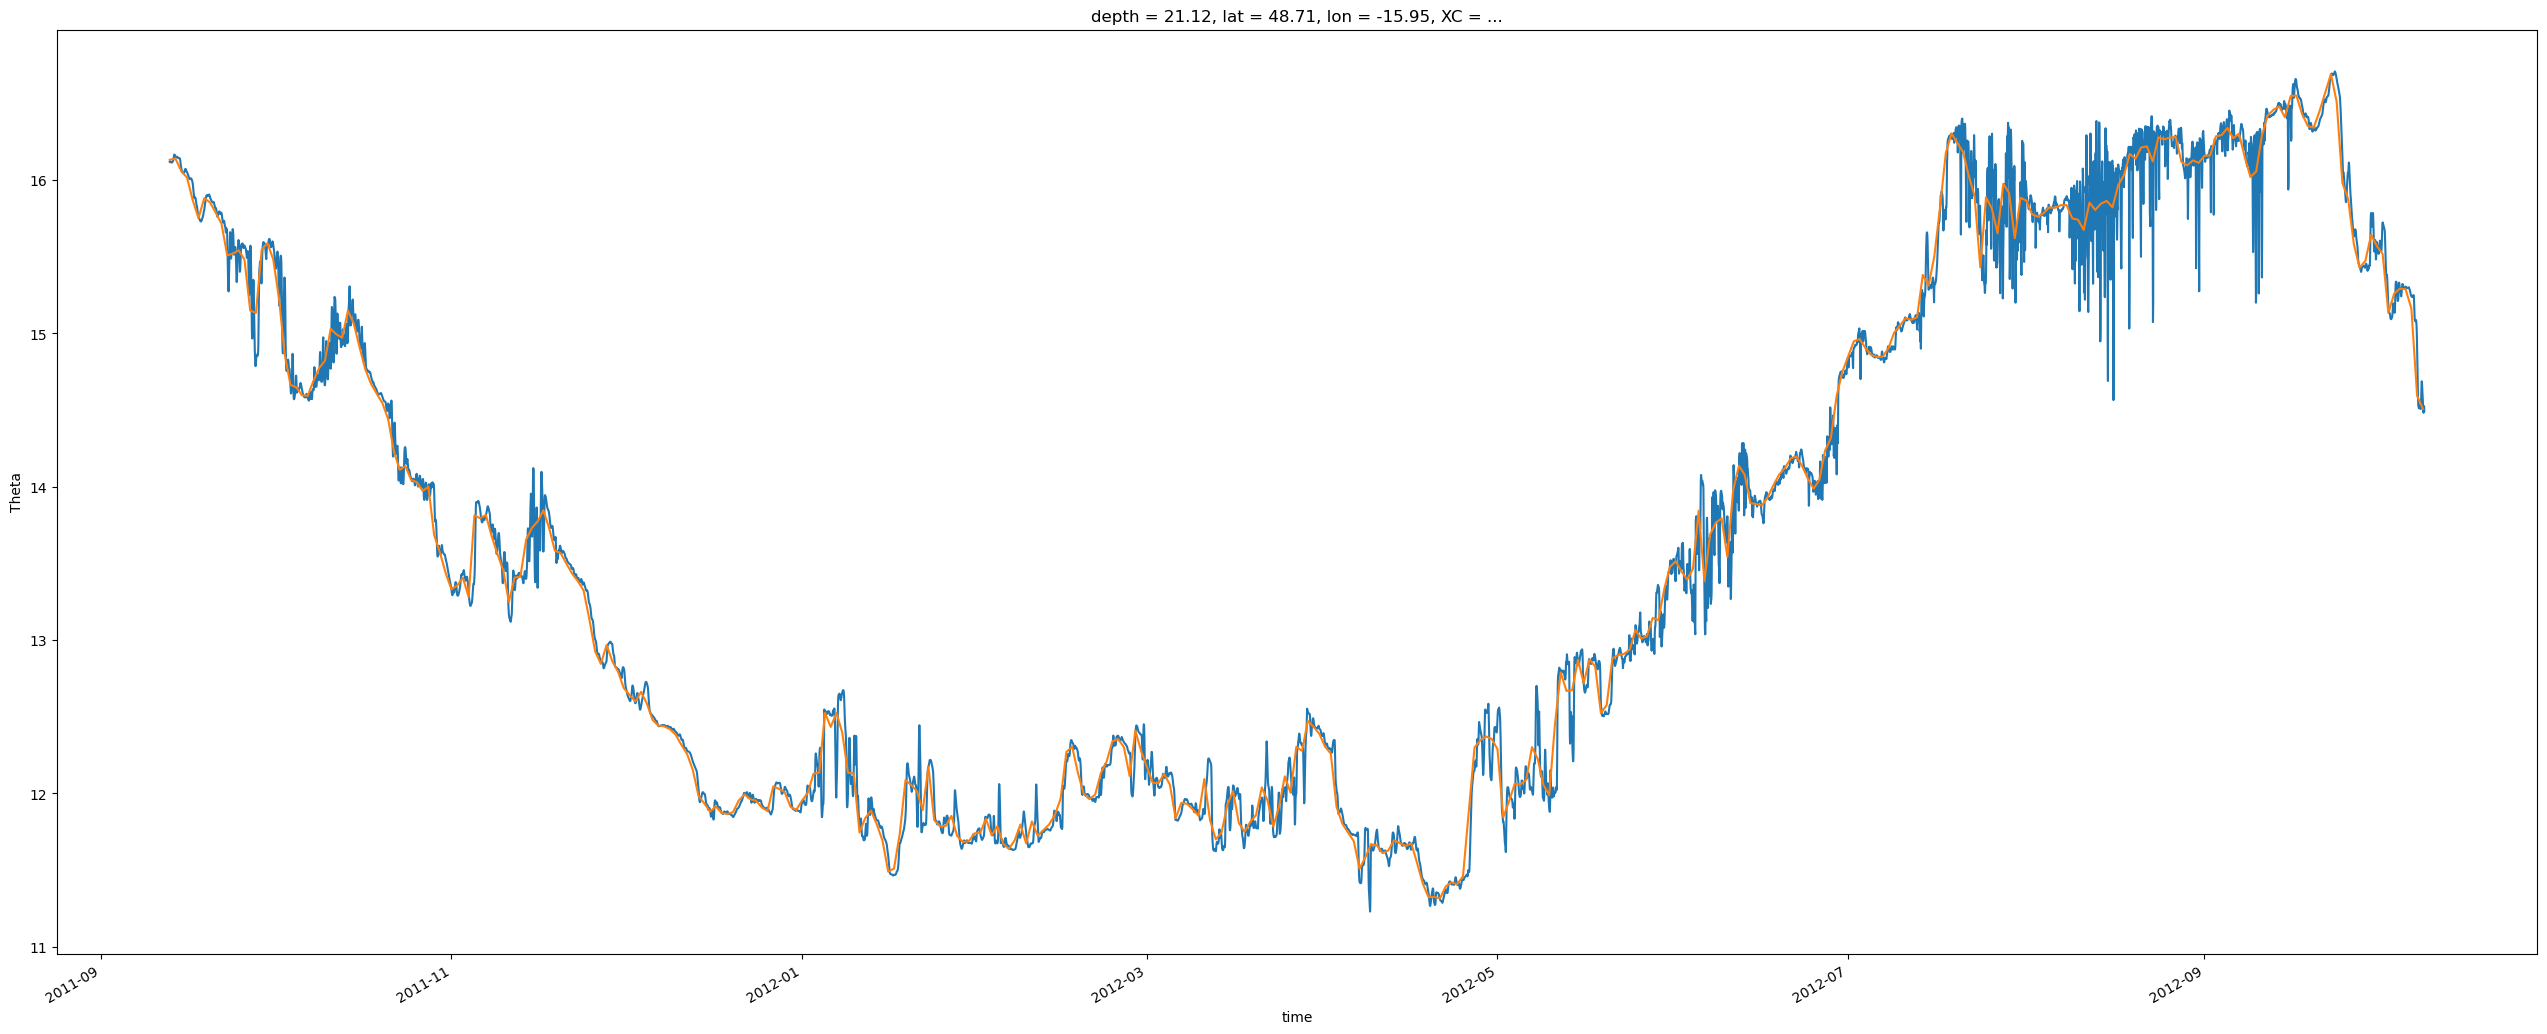

In [30]:
fig = plt.figure(figsize=(32,12))
ds.Theta.isel(lat=100,lon=100, depth=10).plot()
ds_daily.Theta.isel(lat=100,lon=100, depth=10).plot()

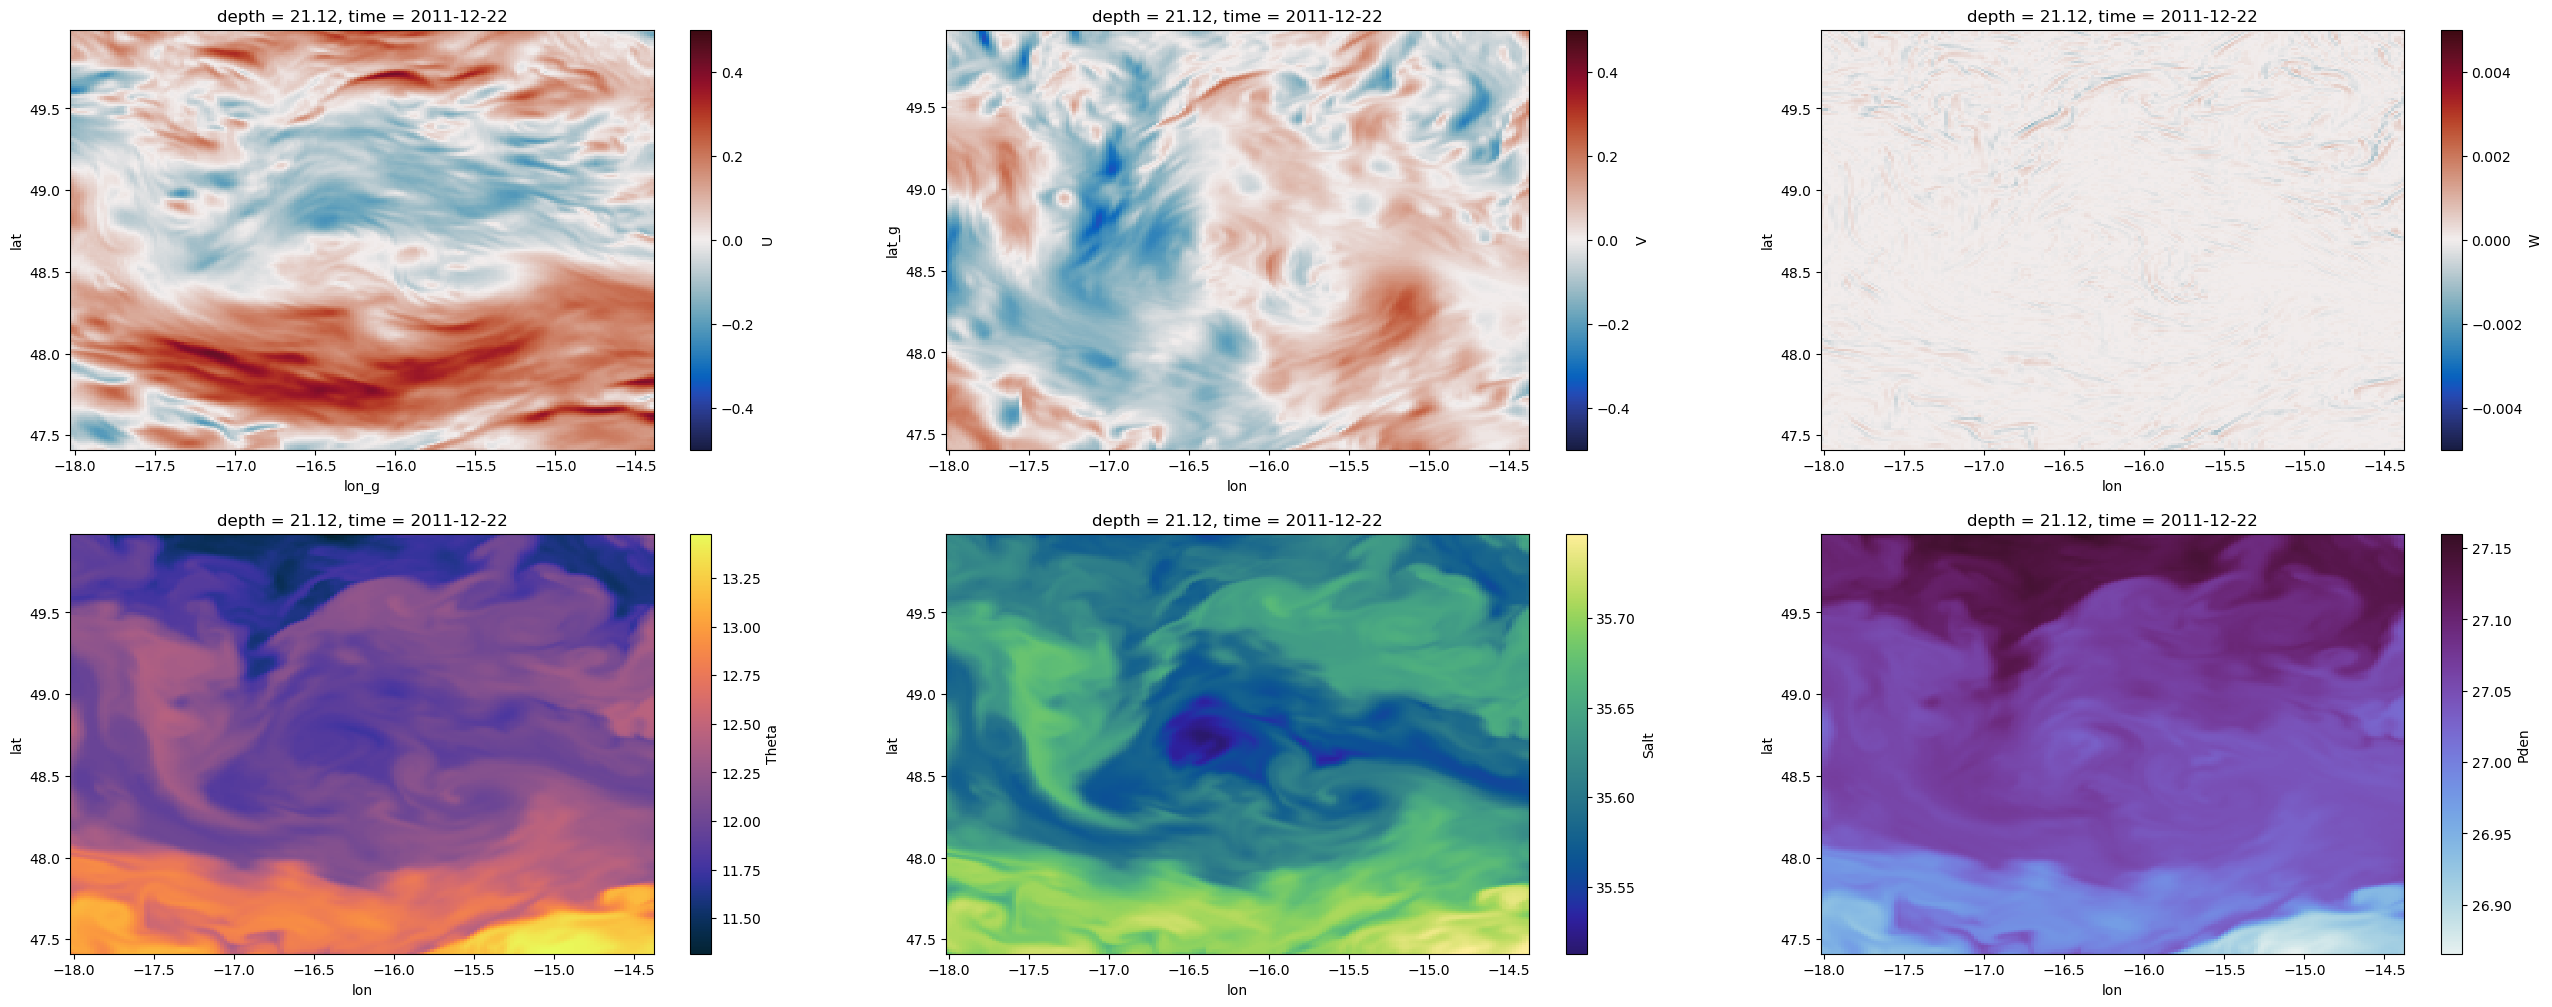

In [22]:
fig = plt.figure(figsize=(32,12))

plt.subplot(231)
ds_daily.U.isel(lat=slice(1,-1),lon_g=slice(1,-1), time=100, depth=10).plot(x='lon_g', y='lat', vmin=-0.5, vmax=0.5, cmap=cm.balance)
plt.subplot(232)
ds_daily.V.isel(lat_g=slice(1,-1),lon=slice(1,-1), time=100, depth=10).plot(x='lon', y='lat_g', vmin=-0.5, vmax=0.5, cmap=cm.balance)
plt.subplot(233)
ds_daily.W.isel(lat=slice(1,-1),lon=slice(1,-1), time=100, depth=10).plot(x='lon', y='lat', vmin=-0.005, vmax=0.005, cmap=cm.balance)

plt.subplot(234)
ds_daily.Theta.isel(lat=slice(1,-1),lon=slice(1,-1), time=100, depth=10).plot(x='lon', y='lat', cmap=cm.thermal)
plt.subplot(235)
ds_daily.Salt.isel(lat=slice(1,-1),lon=slice(1,-1), time=100, depth=10).plot(x='lon', y='lat', cmap=cm.haline)
plt.subplot(236)
ds_daily.Pden.isel(lat=slice(1,-1),lon=slice(1,-1), time=100, depth=10).plot(x='lon', y='lat', cmap=cm.dense)

In [30]:
cluster.close()